# PROBLEMA 4 

La figura presenta datos experimentales reales sobre el número de desintegraciones $\Delta N$ del mesón π en función del tiempo (Stetz et al., 1973). Observe que el tiempo se ha "agrupado" en intervalos $\Delta t = 10$ ns y que la curva suave es la disminución teórica exponencial esperada para un gran número de piones (que no existe). Su problema es deducir la vida útil τ del mesón π a partir de estos datos (la vida útil tabulada del pión es $2.6 × 10 −8$ s).



<img src="metodos.png"> 

Teoría Supongamos que comenzamos con $N_{0}$ partículas en el tiempo $t = 0$ que pueden descomponerse en otras partículas. Si esperamos un corto tiempo $Δt$, entonces un pequeño número $ΔN$ de las partículas decaerá espontáneamente, es decir, sin influencias externas. Esta descomposición es un proceso estocástico, lo que significa que hay un elemento de azar involucrado en cuándo ocurrirá una descomposición, por lo que no se espera que dos experimentos den exactamente los mismos resultados. La ley básica de la naturaleza para la descomposición espontánea es que el número de desintegraciones ΔN en un intervalo de tiempo Δt es proporcional al número de partículas N (t) presentes en ese momento y al intervalo de tiempo

\begin{equation*}
\Delta N(t)=-\frac{1}{\tau}N(t)\Delta t\rightarrow \frac{\Delta N(t)}{\Delta t}=-\lambda N(t)             
\end{equation*}

Aquí $τ = 1 ∕ λ$ es la vida útil de la partícula, con $λ$ el parámetro de velocidad. La tasa de desintegración real viene dada por la segunda ecuación en (7.38). Si el número de desintegraciones $ΔN$ es muy pequeño en comparación con el número de partículas N, y si observamos intervalos de tiempo muy pequeños, la ecuación de diferencia (7.38) se convierte en la ecuación diferencial.

\begin{equation*}
\frac{dN(t)}{dt} \simeq -\lambda N(t)=\frac{1}{\tau}N(t)
\end{equation*}

Esta ecuación diferencial tiene una solución exponencial tanto para el número como para la tasa de desintegración:

\begin{equation*}
N(t)= N_{0}e^{\frac{-t}{\tau }}
\end{equation*}

\begin{equation*}
\frac{dN(t)}{dt}=-\frac{N_{0}}{\tau }e^{\frac{-t}{\tau }}=\frac{dN(0)}{dt}e^{\frac{-t}{\tau }}
\end{equation*}

La ecuación anterior es la fórmula teórica que deseamos "ajustar" a los datos de la figura anterior. La salida de tal ajuste es un "mejor valor" para la vida útil $τ$.

In [13]:
from numpy import arange, loadtxt, log, sqrt
import numpy as np
import matplotlib.pyplot as plt
from math import cos,sin,pi
from pylab import imshow, figure, title
from pylab import plot, show, legend, xlabel, ylabel, title, grid

# RESULTADO PARA LOS PRIMEROS DATOS

In [2]:
data = loadtxt('pion_decay_rubin.dat', comments="//") # abro el archivo donde está el valor de t en la primera 
#columna y el valor de N en la segunda columna

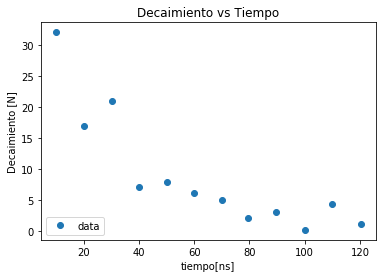

In [3]:
plt.plot(data[:,0], data[:,1], 'o', label='data')
legend(loc='lower left')
plt.ylabel('Decaimiento [N]')
plt.title('Decaimiento vs Tiempo')
plt.xlabel('tiempo[ns]')
plt.show()

Se busca hallar el tiempo de vida util para los datos encontrados experimentalmente, para ello se parte del modelo planteado inicialmente.

Graficando los datos del logaritmo del decaimiento en función del tiempo, para optener una función lineal análoga a:

\begin{equation} 
ln(N)=N_{0} -\frac{t}{\tau }     
\end{equation}

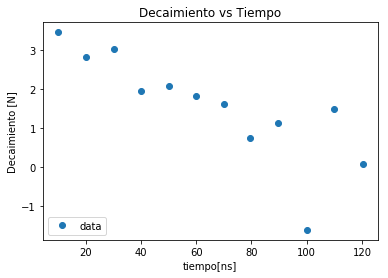

In [4]:
plt.plot(data[:,0], log(data[:,1]),'o', label='data')
legend(loc='lower left')
plt.ylabel('Decaimiento [N]')
plt.title('Decaimiento vs Tiempo')
plt.xlabel('tiempo[ns]')
plt.show()

Con el método de regresión lineal por mínimos cuadrado hayamos la recta que se ajusta a los datos. Con los datos de la regresión lineal encontramos los parámetros de una recta: la pendiente a y el intercepto b, con los cuales definimos una función lineal y  la graficamos junto con los datos.

\begin{equation} 
y=b+ax 
\end{equation} 

In [10]:
def Mincu(dat):
    n = len(dat[:,0])
    err = sqrt(n)
    
    s = 0
    sx = 0
    sy = 0
    sxx = 0
    sxy = 0
    delta = 0

    for i in range(n):
        s += 1/(err*err)
        sx += dat[i,0]
        sy += log(dat[i,1])
        sxx += (dat[i,0]*dat[i,0] )   
        sxy += (dat[i,0]*log(dat[i,1]) )
    
    sx /= (err*err)
    sy /= (err*err)
    sxx /= (err*err)
    sxy /= (err*err)

    delta = s*sxx - (sx*sx)

    b = (sxx*sy - sx*sxy) / delta  #intercepto
    a = (s*sxy - sx*sy) / delta    #pendiente

    return a,b



In [14]:
a,b=Mincu(data)

Y = [ (a*i+b) for i in data[:,0] ]

print("a=", a,"[ns]^-1")
print("b=", b,)

a= -0.03159701673833026 [ns]^-1
b= 3.611024907430632


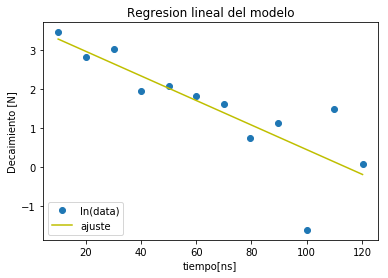

In [17]:
plt.plot(data[:,0], log(data[:,1]), 'o', label="ln(data)")
plt.plot(data[:,0], Y, 'y-', label="ajuste")
legend(loc='lower left')
plt.ylabel('Decaimiento [N]')
plt.title('Regresion lineal del modelo')
plt.xlabel('tiempo[ns]')
plt.show()

Para calcular el valor de vida util, podemos comprar ambas ecuaciones y observar que $\tau$ debería corresponde al inverso de la pendiente  de la función hallada con la regresión lineal


\begin{equation} 
ln(N)=N_{0}-\frac{t}{\tau }      
\end{equation}

\begin{equation} 
Y=b+ax    
\end{equation}

\begin{equation} 
  \tau= - \frac{1}{a}   
\end{equation}

In [21]:
tao=-(1/a)*1e-9
print("tao=",tao,"segundos")


Tteo= 2.6*1e-8

Er= abs((Tteo-tao)/Tteo)*100
print("error1=",Er,"%")

tao= 3.164855746608833e-08 segundos
error1= 21.725221023416655 %


Este tiempo de vida media hallado con estos datos experimentales, se contrasta con los $2.6e(-08)s$ que se esperaban, se encuentra que el resultado está en el orden de magnitud esperado pero con un $21$% de error.


Para verificar el programa, se usa el modelo de regresión lineal de curve_fit y se obtienen los siguientes resultados:

In [24]:
from scipy.optimize import curve_fit
from numpy import exp as npexp

In [25]:
def f_exp(x, m, n):
    return n*npexp(m*x)

popt, pcov = curve_fit(f_exp, data[:,0], data[:,1],[0,0])

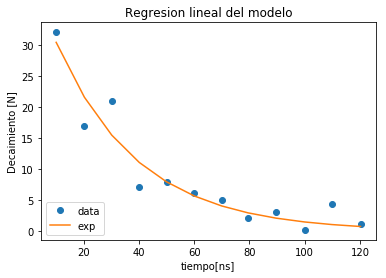

In [26]:
plt.plot(data[:,0], data[:,1], 'o', label="data")
plt.plot(data[:,0], f_exp(data[:,0], *popt), label="exp")
legend(loc='lower left')
plt.ylabel('Decaimiento [N]')
plt.title('Regresion lineal del modelo')
plt.xlabel('tiempo[ns]')
plt.show()



Nuevamente para calcular el valor de la vida util comparamos las ecuaciones exponenciales:

\begin{equation}
 N(t)=N_{o}e^{-\frac{t}{\tau}}   
\end{equation}

\begin{equation}
 Y=be^{mx}   
\end{equation}

Por tanto:

\begin{equation}
 \tau=-\frac{1}{m} 
\end{equation}

In [47]:
m=popt[0] # valor optimo del parametro m 
tao1=(-1/m)*1e-9
print("tao1=",tao1,"segundos")

Er1= abs((Tteo-tao1)/Tteo)*100
print("error=",Er1,"%")

tao1= 2.9742770853746504e-08 segundos
error= 14.395272514409625 %


Con respecto al modelo de regresión lineal de curve_fit se obtuvo un $14.3$% de error, por lo que se puede concluir a priori que se necesitan más datos para realizar una mejor aproximación usando la regresión lineal

# RESULTADO PARA LOS SEGUNDOS DATOS

Para el resultado de esta segunda parte vamos a realizar el mismo procedimiento que en la primera parte, en este caso solo cambiaremos los datos a evaluar de resto todo es similar, por tanto solo se escribira el codigo con el objetivo de no volver a escribir lo mismo.

In [32]:
data1 = loadtxt('decayPiMeson.dat', comments="//") # abro el archivo donde está el valor de t en la primera 
#columna y el valor de N en la segunda columna

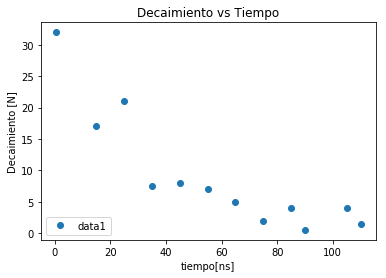

In [33]:
plt.plot(data1[:,0], data1[:,1], 'o', label='data1')
legend(loc='lower left')
plt.ylabel('Decaimiento [N]')
plt.title('Decaimiento vs Tiempo')
plt.xlabel('tiempo[ns]')
plt.show()

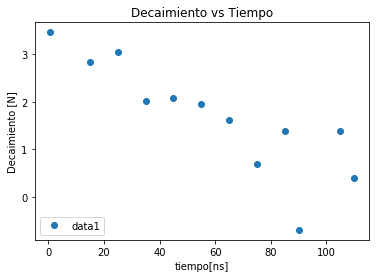

In [35]:
plt.plot(data1[:,0], log(data1[:,1]),'o', label='data1')
legend(loc='lower left')
plt.ylabel('Decaimiento [N]')
plt.title('Decaimiento vs Tiempo')
plt.xlabel('tiempo[ns]')
plt.show()

In [36]:
def Mincu(dat):
    n = len(dat[:,0])
    err = sqrt(n)
    
    s = 0
    sx = 0
    sy = 0
    sxx = 0
    sxy = 0
    delta = 0

    for i in range(n):
        s += 1/(err*err)
        sx += dat[i,0]
        sy += log(dat[i,1])
        sxx += (dat[i,0]*dat[i,0] )   
        sxy += (dat[i,0]*log(dat[i,1]) )
    
    sx /= (err*err)
    sy /= (err*err)
    sxx /= (err*err)
    sxy /= (err*err)

    delta = s*sxx - (sx*sx)

    b = (sxx*sy - sx*sxy) / delta  #intercepto
    a = (s*sxy - sx*sy) / delta    #pendiente

    return a,b

In [37]:
a1,b1=Mincu(data)

Y1 = [ (a1*i+b1) for i in data1[:,0] ]

print("a1=", a1,"[ns]^-1")
print("b1=", b1,)

a1= -0.028120744167616542 [ns]^-1
b1= 3.334200262407691


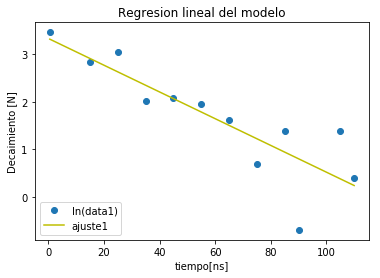

In [38]:
plt.plot(data1[:,0], log(data1[:,1]), 'o', label="ln(data1)")
plt.plot(data1[:,0], Y1, 'y-', label="ajuste1")
legend(loc='lower left')
plt.ylabel('Decaimiento [N]')
plt.title('Regresion lineal del modelo')
plt.xlabel('tiempo[ns]')
plt.show()

In [46]:
tao1=-(1/a1)*1e-9
print("tao1=",tao1,"segundos")


Tteo= 2.6*1e-8

Er1= abs((Tteo-tao1)/Tteo)*100
print("error=",Er1,"%")

tao1= 3.556093658259536e-08 segundos
error= 36.77283300998214 %


Este tiempo de vida media hallado con estos datos experimentales, se contrasta con los $2.6e(-08)s$ que se esperaban, se encuentra que el resultado está en el orden de magnitud esperado pero con un $36.77$% de error.


Para verificar el programa, se usa el modelo de regresión lineal de curve_fit y se obtienen los siguientes resultados:

In [41]:
from scipy.optimize import curve_fit
from numpy import exp as npexp

In [42]:
def f_exp(x, m, n):
    return n*npexp(m*x)

popt1, pcov1 = curve_fit(f_exp, data1[:,0], data1[:,1],[0,0])

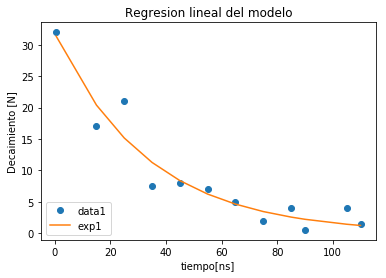

In [43]:
plt.plot(data1[:,0], data1[:,1], 'o', label="data1")
plt.plot(data1[:,0], f_exp(data1[:,0], *popt1), label="exp1")
legend(loc='lower left')
plt.ylabel('Decaimiento [N]')
plt.title('Regresion lineal del modelo')
plt.xlabel('tiempo[ns]')
plt.show()

In [48]:
m1=popt1[0] # valor optimo del parametro m 
tao2=(-1/m1)*1e-9
print("tao2=",tao2,"segundos")

Er2= abs((Tteo-tao2)/Tteo)*100
print("error=",Er2,"%")

tao2= 3.364653150794722e-08 segundos
error= 29.409736569027757 %


Nuevamente podemos decir que con respecto al modelo de regresión lineal de curve_fit se obtuvo un $29.4$% de error, por lo que se puede concluir a priori que se necesitan más datos para realizar una mejor aproximación usando la regresión lineal